# MNIST Data
I'll make a t-SNE plot using the MNIST data as a dataframe. I'm loading the data using clustergrammer. 

In [11]:
from clustergrammer import Network
net = Network()

In [12]:
# get dataframe 
net.load_file('mnist.txt')
net.swap_nan_for_zero()
inst_df = net.dat_to_df()
df = inst_df['mat']

In [13]:
# export dataframe into numpy matrix for tsne
columns = df.columns.tolist()
rows = df.index.tolist()
mat = df.values

# t-SNE plot

I'll use the example from the Visualizing with t-SNE notebook

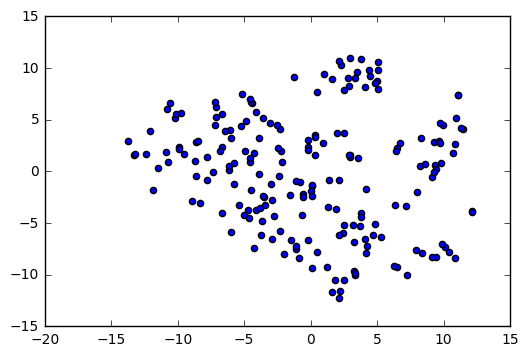

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from tsne import bh_sne

# the matrix needs to be transposed in order to cluster the numbers
x_data = mat.transpose()

# convert image data to float64 matrix. float64 is need for bh_sne
x_data = np.asarray(x_data).astype('float64')

# perform t-SNE embedding
vis_data = bh_sne(x_data)

# plot the result
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]

plt.scatter(vis_x, vis_y)
plt.show()

In [7]:
print(x_data.shape)

(200, 784)
